In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
datasets=pd.read_csv("C://Users//basit//Downloads/Finance.csv")
datasets.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
datasets.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
datasets.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
#sns.countplot(x = datasets['Gender']) # we can also check the tyoe of data using this i mean wether it is numeric or string
#datasets['Gender'].mode()[0]
#datasets['Gender'] = datasets['Gender'].fillna(datasets['Gender'].mode()[0])

In [29]:
datasets['Gender'] = datasets['Gender'].fillna(datasets['Gender'].mode()[0])
datasets['Married'] = datasets['Married'].fillna(datasets['Married'].mode()[0])
datasets['Dependents'] = datasets['Dependents'].fillna(datasets['Dependents'].mode()[0])
datasets['Self_Employed'] = datasets['Self_Employed'].fillna(datasets['Self_Employed'].mode()[0])
datasets['LoanAmount'] = datasets['LoanAmount'].fillna(datasets['LoanAmount'].median())
datasets['Loan_Amount_Term'] = datasets['Loan_Amount_Term'].fillna(datasets['Loan_Amount_Term'].median())
datasets['Credit_History'] = datasets['Credit_History'].fillna(datasets['Credit_History'].median())




In [30]:
datasets.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
datasets

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [36]:
datasets.replace({
        "Loan_Status" : {'N' : 0, 'Y' : 1},
        "Gender" : {'Male' : 0, 'Female' : 1 },
        "Education" : {'Graduate' : 0, 'Not Graduate' : 1},
        "Married" : {'No' : 0, 'Yes' : 1},
        "Self_Employed" : {'No' : 0, 'Yes' : 1}

},inplace = True)

C:\Users\basit\AppData\Local\Temp\ipykernel_11924\2627388762.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datasets.replace({


In [38]:
datasets = datasets.join(pd.get_dummies(datasets["Dependents"])).drop(["Dependents"],axis=1)
datasets = datasets.join(pd.get_dummies(datasets["Property_Area"])).drop(["Property_Area"],axis=1)

In [41]:
datasets.map(lambda x:1 if x==True else 0 if x is False else x)

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,0,1,2,3+,Rural,Semiurban,Urban
0,LP001002,0,0,0,0,5849,0.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
1,LP001003,0,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,LP001005,0,1,0,1,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,LP001006,0,1,1,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,LP001008,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,0,2900,0.0,71.0,360.0,1.0,1,1,0,0,0,1,0,0
610,LP002979,0,1,0,0,4106,0.0,40.0,180.0,1.0,1,0,0,0,1,1,0,0
611,LP002983,0,1,0,0,8072,240.0,253.0,360.0,1.0,1,0,1,0,0,0,0,1
612,LP002984,0,1,0,0,7583,0.0,187.0,360.0,1.0,1,0,0,1,0,0,0,1


In [42]:
x=datasets.drop(["Loan_ID","Loan_Status"],axis=1)
y=datasets["Loan_Status"]

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [92]:
rf = RandomForestClassifier(random_state=0,max_depth=3,min_samples_split=0.01,max_features=0.5,max_samples=0.5)

In [93]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, max_features=0.5, max_samples=0.5,
                       min_samples_split=0.01, random_state=0)

In [94]:
rf.score(x_test,y_test)

0.7886178861788617

In [95]:
rf.score(x_train,y_train)

0.8167006109979633

In [98]:
importances = pd.DataFrame(rf.feature_importances_)
features = x.columns
importances['features'] = features
importances.columns = ['importance', 'feature']
importances.sort_values(by='importance', ascending=True, inplace=True)

<BarContainer object of 16 artists>

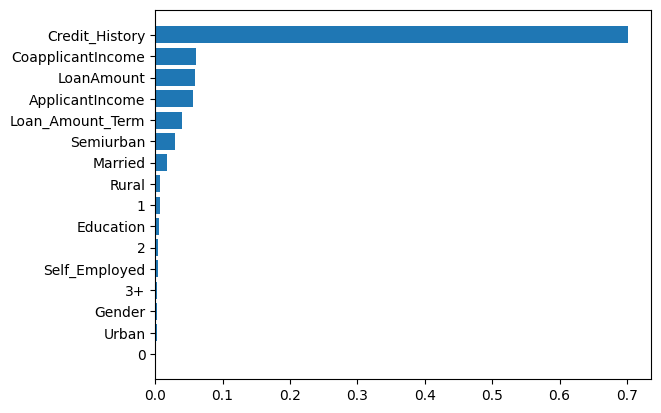

In [99]:
plt.barh(importances.feature,importances.importance)

In [100]:
rf_proba = rf.predict_proba(x_test)
rf_predict = rf.predict(x_test)
print(rf_proba[0:10])
print(rf_predict)

[[0.16870994 0.83129006]
 [0.16184218 0.83815782]
 [0.18880529 0.81119471]
 [0.31833211 0.68166789]
 [0.231118   0.768882  ]
 [0.20110715 0.79889285]
 [0.15513204 0.84486796]
 [0.2437705  0.7562295 ]
 [0.19306327 0.80693673]
 [0.19551881 0.80448119]]
[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1]
